* First of all, We should import most needed library and package :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

 * Our dataset is in the CSV format and we use pandas function like read_csv to import data to our environment

In [2]:
Data = pd.read_csv(r'Your Path')
data = pd.DataFrame(Data)

# Read the test data
test = pd.read_csv(r'Your Path')

In [3]:
#gives information about the data types,columns, null value counts, memory usage etc
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
#basic statistic details about the data
data.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot: >

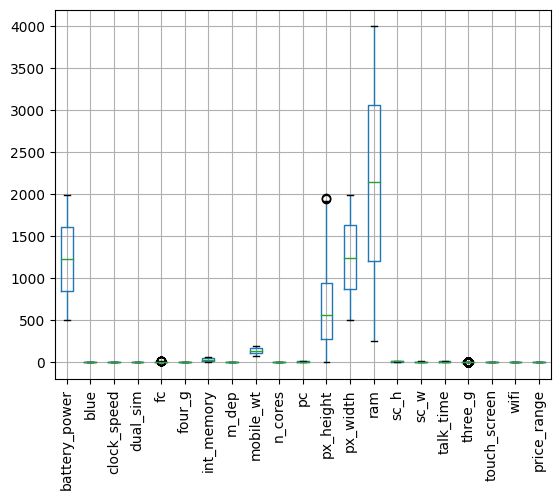

In [6]:
%matplotlib inline
data.boxplot(rot=90)

array([[<AxesSubplot: title={'center': 'battery_power'}>,
        <AxesSubplot: title={'center': 'blue'}>,
        <AxesSubplot: title={'center': 'clock_speed'}>,
        <AxesSubplot: title={'center': 'dual_sim'}>,
        <AxesSubplot: title={'center': 'fc'}>],
       [<AxesSubplot: title={'center': 'four_g'}>,
        <AxesSubplot: title={'center': 'int_memory'}>,
        <AxesSubplot: title={'center': 'm_dep'}>,
        <AxesSubplot: title={'center': 'mobile_wt'}>,
        <AxesSubplot: title={'center': 'n_cores'}>],
       [<AxesSubplot: title={'center': 'pc'}>,
        <AxesSubplot: title={'center': 'px_height'}>,
        <AxesSubplot: title={'center': 'px_width'}>,
        <AxesSubplot: title={'center': 'ram'}>,
        <AxesSubplot: title={'center': 'sc_h'}>],
       [<AxesSubplot: title={'center': 'sc_w'}>,
        <AxesSubplot: title={'center': 'talk_time'}>,
        <AxesSubplot: title={'center': 'three_g'}>,
        <AxesSubplot: title={'center': 'touch_screen'}>,
        <

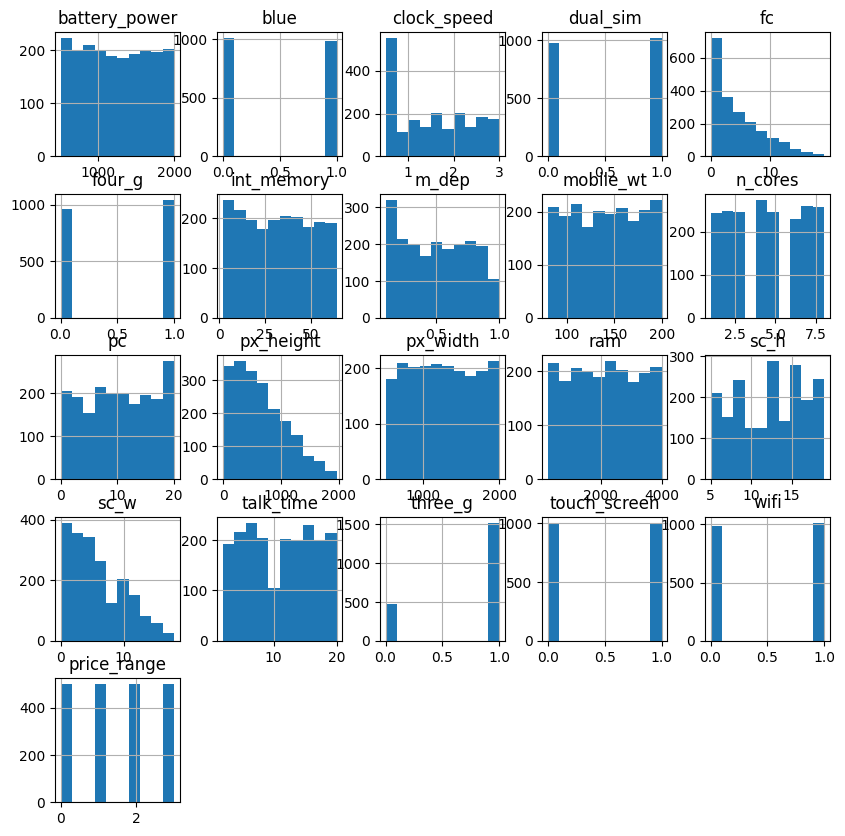

In [7]:
data.hist(figsize=(10,10))

price_range
0    500
1    500
2    500
3    500
dtype: int64


<AxesSubplot: title={'center': 'Distribution of failure'}, xlabel='price_range'>

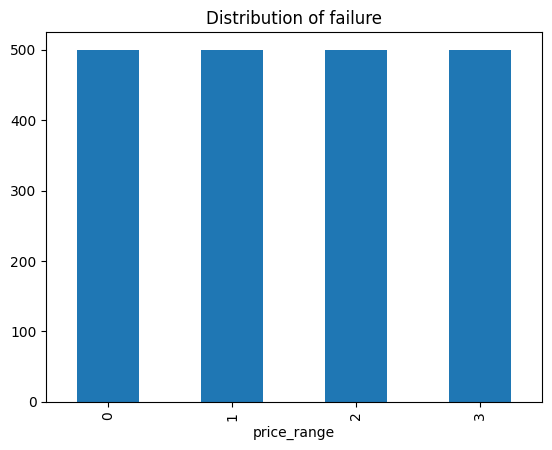

In [8]:
target_dist=data.groupby('price_range').size()
print(target_dist)

%matplotlib inline

#Visualize Class Counts
target_dist.plot.bar(x='',y='',title='Distribution of failure')

In [9]:
X = data.drop(['price_range'],axis=1)

test_copy = test
test = test.drop(['id'],axis=1)
 
y = data.price_range.values 

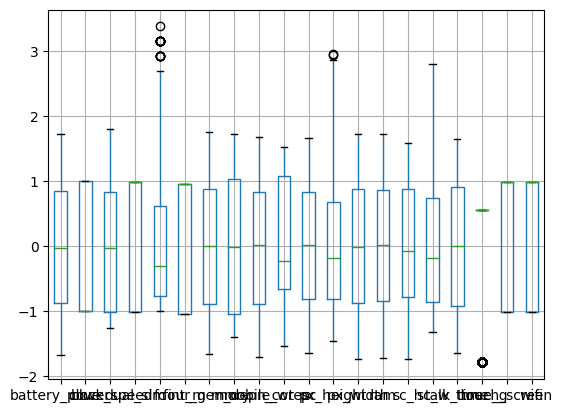

In [10]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
scaler_test = StandardScaler().fit(test)

# We compute the scaler
scaled_data = scaler.transform(X.astype(float))
scaled_X = pd.DataFrame(scaled_data.astype(float))
scaled_X.columns = X.columns

# We compute the scaler test
scaled_data_test = scaler_test.transform(test.astype(float))
scaled_test = pd.DataFrame(scaled_data_test.astype(float))
scaled_test.columns = test.columns


scaled_X.boxplot()
# scaled_tyres_test.boxplot()

X = scaled_X.copy()
test = scaled_test.copy()


In [11]:
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,  #X_scaled
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(1400, 20)


In [12]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [13]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(svm.SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [14]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)
y_pred_train = final_model.predict(X_train)
# y_pred_label = list(encoder.inverse_transform(y_pred))

Best score for training data: 0.9642857142857142 

Best C: 1000 

Best Kernel: linear 

Best Gamma: scale 



In [15]:
from sklearn.metrics import f1_score


print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, y_pred_train,average='weighted'))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred,average='weighted'))
#average='micro'

***RESULTS ON TRAIN SET***
f1_score:  0.9978561195314394
--
***RESULTS ON TEST SET***
f1_score:  0.9598141942165542


In [16]:
predicted_prices = final_model.predict(test)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 0 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 2 0 3 1 3 1 1 3 3 3 0 1 0 1 2 3 1 2 1 2 2 3
 3 0 2 0 1 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 2 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 3 2 0 2 2 1 3 1 1 0 3 2 1 2 1 3 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 0 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 1 2 2 3 2 2 1 1 0 1 3 0 2 2 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 1 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 1 1 3 2 1 3 0 0 2 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 1 0 3 2 0 2 3 0
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 0 2 0 3 2 3 3 1 3 1 3 1 3 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 2 0 2 3 3 0 3 0 2 3 2 3 0 2 0 2 3 0 1 1 0 0 1
 1 1 3 3 3 2 3 1 2 2 3 3 

* Prepare Submission File

In [21]:
my_submission = pd.DataFrame({'Id': test_copy.id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [22]:
test_copy

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [18]:
type(test_copy)

pandas.core.frame.DataFrame